In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load dataset
data = pd.read_excel('../Listings.xlsx')
data.head()

,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build
0,2023,Hyundai,Tucson,39860,575,VIC,*Excl. Govt. Charges,Petrol,2.0L SUV FWD,1711775988,Drive,SUV
1,2021,Toyota,RAV4,48990,26346,NSW,*Excl. Govt. Charges,Hybrid,2.5L SUV FWD Hybrid,1711775989,Drive,SUV
2,2022,LDV,T60,34996,24444,WA,*Excl. Govt. Charges,Diesel,LUXE 2.0L Diesel Dual Cab Ute 4XD,1711775989,Drive,UTE
3,2020,Mazda,CX-3,25490,46351,NSW,*Excl. Govt. Charges,Petrol,Sport 2.0L SUV FWD,1711775992,Drive,SUV
4,2022,Hyundai,i30,55950,6700,VIC,*Excl. Govt. Charges,Petrol,2.0L Hatchback FWD,1711775992,Drive,OTHER


In [2]:
# Read the Excel file
df = pd.read_excel('ElectricVehiclesInfoFromShowroomLinks.xlsx')

# Select only the specified columns
msrp_data = df[['Year', 'Make', 'Model', 'Fuel Type', 'Car Type','MSRP', 'Range']]

msrp_data.head()

,Year,Make,Model,Fuel Type,Car Type,MSRP,Range
0,2021,Porsche,Taycan,Electric,Wagon 4WD,176600,437
1,2021,Hyundai,IONIQ,Electric,Elite FWD,49970,373
2,2019,Tesla,Model S,Electric,Hatchback 4WD,127885,511
3,2022,Tesla,Model 3,Electric,Sedan RWD,65500,556
4,2020,Tesla,Model 3,Electric,Sedan RWD,73900,620


In [3]:
# Define the columns to check for duplicates
columns_to_check = ['Year', 'Make', 'Model', 'Price', 'Mileage', 'Location']

before_removal = len(data)

# Drop duplicates based on the specified columns
data_unique = data.drop_duplicates(subset=columns_to_check)

after_removal = len(data_unique)

removed = before_removal - after_removal

print(removed)

data_unique.head()

172


,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build
0,2023,Hyundai,Tucson,39860,575,VIC,*Excl. Govt. Charges,Petrol,2.0L SUV FWD,1711775988,Drive,SUV
1,2021,Toyota,RAV4,48990,26346,NSW,*Excl. Govt. Charges,Hybrid,2.5L SUV FWD Hybrid,1711775989,Drive,SUV
2,2022,LDV,T60,34996,24444,WA,*Excl. Govt. Charges,Diesel,LUXE 2.0L Diesel Dual Cab Ute 4XD,1711775989,Drive,UTE
3,2020,Mazda,CX-3,25490,46351,NSW,*Excl. Govt. Charges,Petrol,Sport 2.0L SUV FWD,1711775992,Drive,SUV
4,2022,Hyundai,i30,55950,6700,VIC,*Excl. Govt. Charges,Petrol,2.0L Hatchback FWD,1711775992,Drive,OTHER


In [4]:
# Perform the merge
merged_data = pd.merge(
    data_unique,
    msrp_data[['Year', 'Make', 'Model', 'Fuel Type', 'Car Type', 'MSRP', 'Range']],
    on=['Year', 'Make', 'Model', 'Fuel Type', 'Car Type'],
    how='inner'
)

# Display the merged data
merged_data.head()

,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build,MSRP,Range
0,2021,Tesla,Model 3,44990,25544,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711775997,Drive,OTHER,59900,423
1,2021,Tesla,Model 3,47990,23104,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711776120,Drive,OTHER,59900,423
2,2021,Tesla,Model 3,45990,27200,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711776551,Drive,OTHER,59900,423
3,2021,Tesla,Model 3,44950,66471,VIC,*Excl. Govt. Charges,Electric,Sedan RWD,1711776615,Drive,OTHER,59900,423
4,2021,Tesla,Model 3,43490,50985,VIC,*Excl. Govt. Charges,Electric,Sedan RWD,1711777483,Drive,OTHER,59900,423


In [5]:
import datetime

# Calculate the Retention Rate
merged_data['Retention Rate'] = merged_data['Price'] / merged_data['MSRP']

# Calculate the Age of the cars
current_year = datetime.datetime.now().year
merged_data['Age'] = current_year - merged_data['Year']
merged_data = merged_data[merged_data['Age'] > 0]



merged_data['Fuel Type Adjusted'] = merged_data.apply(lambda x:
                                        ('Electric' if x['Fuel Type'] == 'Electric' else
                                         ('Hybrid' if x['Fuel Type'] == 'Hybrid' else 'Conventional')),
                                        axis=1)


merged_data.head()

#merged_data.to_csv("merged_data.csv", index=False)

,Year,Make,Model,Price,Mileage,Location,Additional,Fuel Type,Car Type,Scraping Time,Source,Car Build,MSRP,Range,Retention Rate,Age,Fuel Type Adjusted
0,2021,Tesla,Model 3,44990,25544,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711775997,Drive,OTHER,59900,423,0.751085,3,Electric
1,2021,Tesla,Model 3,47990,23104,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711776120,Drive,OTHER,59900,423,0.801169,3,Electric
2,2021,Tesla,Model 3,45990,27200,NSW,*Excl. Govt. Charges,Electric,Sedan RWD,1711776551,Drive,OTHER,59900,423,0.767780,3,Electric
3,2021,Tesla,Model 3,44950,66471,VIC,*Excl. Govt. Charges,Electric,Sedan RWD,1711776615,Drive,OTHER,59900,423,0.750417,3,Electric
4,2021,Tesla,Model 3,43490,50985,VIC,*Excl. Govt. Charges,Electric,Sedan RWD,1711777483,Drive,OTHER,59900,423,0.726043,3,Electric


Age 1 Linear Regression:
  Gradient: -0.0004 (±0.0001)
  Intercept: 1.0630 (±0.0479)
  R^2: 0.0331
  P-value: 2.1220e-04

Age 2 Linear Regression:
  Gradient: -0.0002 (±0.0001)
  Intercept: 0.8427 (±0.0464)
  R^2: 0.0244
  P-value: 5.0237e-02

Age 3 Linear Regression:
  Gradient: 0.0001 (±0.0001)
  Intercept: 0.7419 (±0.0385)
  R^2: 0.0156
  P-value: 9.8060e-02

Age 4 Linear Regression:
  Gradient: -0.0001 (±0.0001)
  Intercept: 0.6446 (±0.0356)
  R^2: 0.0173
  P-value: 2.5119e-01

Age 5 Linear Regression:
  Gradient: -0.0000 (±0.0001)
  Intercept: 0.6068 (±0.0314)
  R^2: 0.0065
  P-value: 5.2164e-01



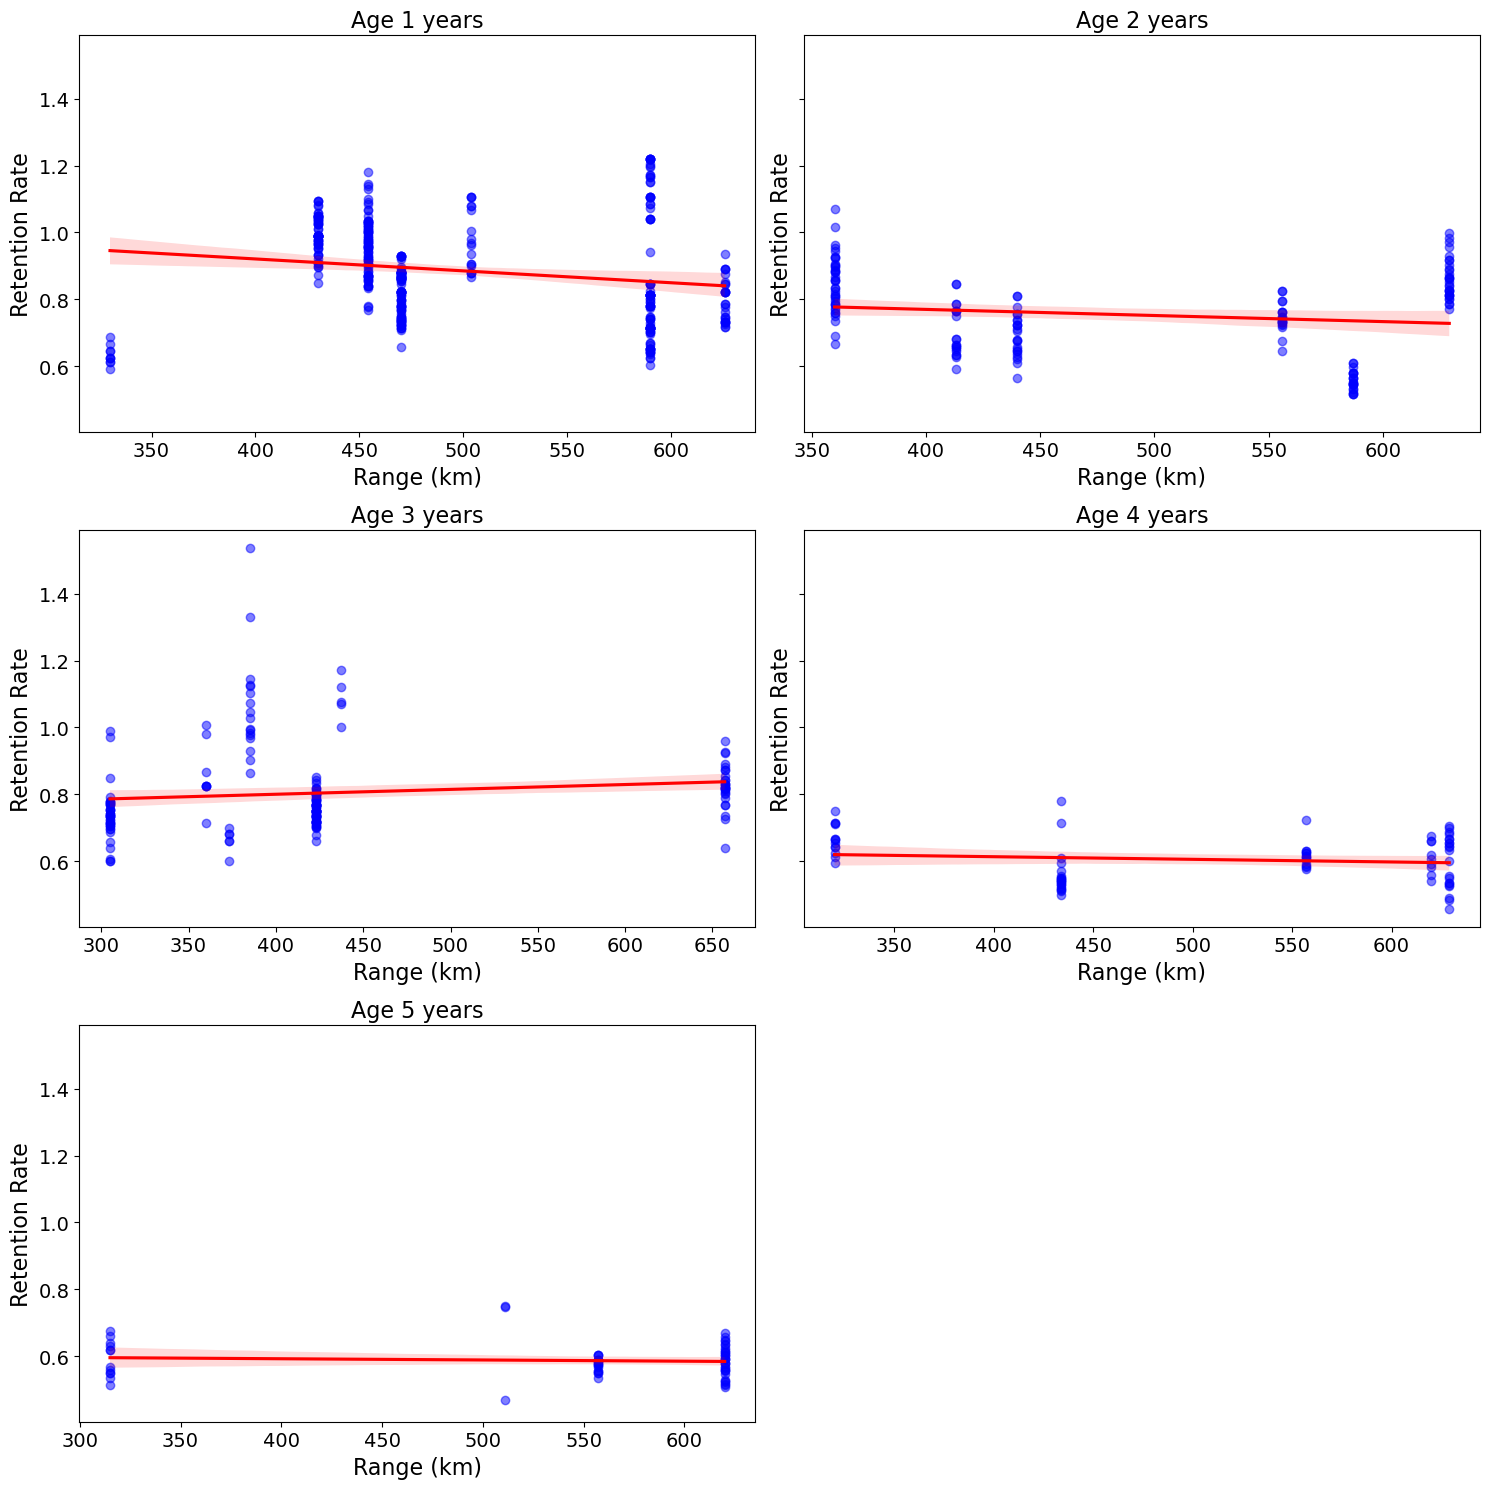

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming 'merged_data' is your DataFrame
ages = sorted(merged_data['Age'].unique())

# Set up the figure for subplots with 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharey=True)

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Loop through each age and create a plot
for index, age in enumerate(ages):
    ax = axs[index]
    subset = merged_data[merged_data['Age'] == age]
    
    # Use Seaborn to plot the scatter and fit line without a legend
    sns.regplot(x='Range', y='Retention Rate', data=subset, ax=ax,
                scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={'color': 'red'}, label=None)
    
    # Using statsmodels for a more detailed statistical analysis
    X = sm.add_constant(subset['Range'])  # adding a constant for the intercept
    model = sm.OLS(subset['Retention Rate'], X).fit()
    
    # Print out the statistics to console
    print(f"Age {age} Linear Regression:")
    print(f"  Gradient: {model.params[1]:.4f} (±{model.bse[1]:.4f})")
    print(f"  Intercept: {model.params[0]:.4f} (±{model.bse[0]:.4f})")
    print(f"  R^2: {model.rsquared:.4f}")
    print(f"  P-value: {model.f_pvalue:.4e}\n")
    
    # Set plot labels and titles
    ax.set_title(f'Age {age} years', fontsize=16)
    ax.set_xlabel('Range (km)', fontsize=16)
    ax.set_ylabel('Retention Rate', fontsize=16)
    
    # Increase font size of axis numbers (tick labels)
    ax.tick_params(axis='both', which='major', labelsize=14)

# Remove any unused subplots (if less than 6 ages)
for i in range(len(ages), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


In [7]:
# Use this to show no real correlation